## Working with Synthetic Stellar Population (SSP) models.

This tutorial demonstrates how to read the synthetic stellar population (SSP) models that are used by Galacticus. For this tutorial you will need to have the Galacticus datasets repository downloaded.

If the SSP model files are not found in the static or dynamic subdirectories, then they will be automatically downloaded and placed in the dynamic subdirectory. For this python package to locate the datasets repository, you will need to have set an environment variable GALACTICUS_DATASETS with the path to the datasets repository.

In [13]:
# We'll be doing some plotting in this tutorial so we will begin by loading the appropriate plotting utilities.
from galacticus.plotting.utils import *
%matplotlib inline

The **`GalacticusSyntheticStellarPopulations`** class is the primary class used for loading in SSP models. 

In [14]:
from galacticus.stellarPopulations import GalacticusSyntheticStellarPopulations

In [15]:
# Create an instance of the GalacticusSyntheticStellarPopulations class
GalSSP = GalacticusSyntheticStellarPopulations()

This class stores the path to the directory containing the SSP model files, as well as a list of the available SSP model files.

In [16]:
print("SSP models stored in directory: "+GalSSP.path)
print("Models:")
for model in GalSSP.models:
    print("   "+model)

SSP models stored in directory: /Users/amerson/codes/Galacticus/datasets/dynamic/stellarPopulations/
Models:
   SSP_Spectra_BPASS_single.hdf5
   SSP_Spectra_BC2003_highResolution_imfSalpeter.hdf5
   SSP_Spectra_Conroy-et-al_v2.5_imfSalpeter.hdf5
   SSP_Spectra_Maraston_hbMorphologyRed_imfSalpeter.hdf5
   SSP_Spectra_BC2003_highResolution_imfChabrier.hdf5
   SSP_Spectra_Conroy-et-al_v2.5_imfKroupa.hdf5
   SSP_Spectra_Maraston_hbMorphologyRed_imfKroupa.hdf5
   SSP_Spectra_Conroy-et-al_v2.5_imfChabrier:mLow0.100:mUp125.000:mTrans1.000:m0.080:sigma0.690:alpha-2.300.hdf5
   SSP_Spectra_BC2003_lowResolution_imfChabrier.hdf5
   SSP_Spectra_BC2003_lowResolution_imfSalpeter.hdf5


An SSP model can be loaded using the **`GalacticusSyntheticStellarPopulations.load()`** function, which will return an instance of the **`SyntheticStellarPopulation`** class, which stores the spectra as a function of age, metallicity and wavelength. For some SSP models it will also store the IMF.

In [60]:
# Load an example SSP.
sspFile = GalSSP.path+"SSP_Spectra_Maraston_hbMorphologyRed_imfSalpeter.hdf5"
SSP = GalSSP.load(sspFile)

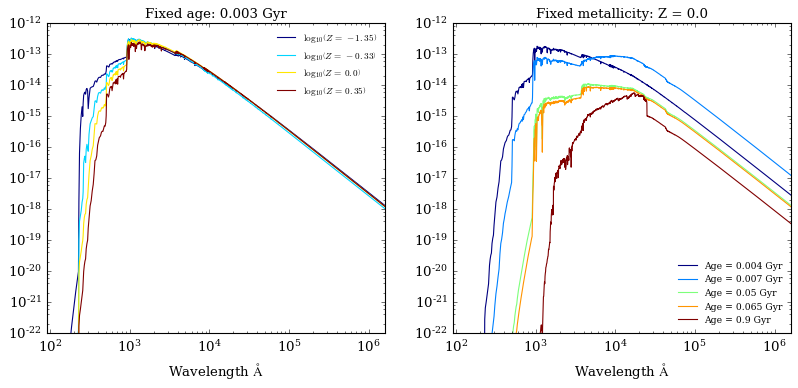

In [59]:
# Plot spectra for example ages and metallicities
fig = figure(figsize=(12,5))
# Plot N examples
N = 5
# Get indices for a fixed age and varying metallicity
ageIndex = np.arange(len(SSP.ages))
np.random.shuffle(ageIndex)
ageIndex = ageIndex[0]
metalsIndex = np.arange(len(SSP.metallicities))
np.random.shuffle(metalsIndex)
metalsIndex = np.sort(metalsIndex[:N])
carr = colour_array(len(metalsIndex))
ax = fig.add_subplot(121,yscale='log',xscale='log')
for i,imetal in enumerate(metalsIndex):
        label = "$\log_{10}\left (Z\,=\,"+str(SSP.metallicities[imetal])+"\\right )$"
        ax.plot(SSP.wavelengths,SSP.spectra[imetal,ageIndex,:]+1.0e-50,c=carr[i],label=label)
ax.legend(loc=0)
ax.set_ylim(bottom=1.0e-22)
ax.set_xlim(SSP.wavelengths.min(),SSP.wavelengths.max())
ax.set_xlabel("Wavelength ${\\rm \\AA}$")
ax.set_title("Fixed age: "+str(SSP.ages[ageIndex])+" Gyr")
# Get indices for fixed metallicity and varying age
ageIndex = np.arange(len(SSP.ages))
np.random.shuffle(ageIndex)
ageIndex = np.sort(ageIndex[:N])
metalsIndex = np.arange(len(SSP.metallicities))
np.random.shuffle(metalsIndex)
metalsIndex = metalsIndex[0]
carr = colour_array(len(ageIndex))
ax = fig.add_subplot(122,yscale='log',xscale='log')
for i,iage in enumerate(ageIndex):
        label = "Age = "+str(SSP.ages[iage])+" Gyr"
        ax.plot(SSP.wavelengths,SSP.spectra[metalsIndex,iage,:]+1.0e-50,c=carr[i],label=label)
ax.legend(loc=0)
ax.set_ylim(bottom=1.0e-22)
ax.set_xlim(SSP.wavelengths.min(),SSP.wavelengths.max())
ax.set_xlabel("Wavelength ${\\rm \\AA}$")
ax.set_title("Fixed metallicity: Z = "+str(SSP.metallicities[metalsIndex]))
show()